<a href="https://colab.research.google.com/github/mikachou/cac40-dogs-draft/blob/main/CAC40_Portfolio_optimization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

we are considering the 2022 Dogs10:

Crédit Agricole (ACA.PA), Total Energie (TTE.PA), Axa (CS.PA), Bouygues (EN.PA), Orange (ORA.PA), Vivendi (VIV.PA), BNP (BNP.PA), Engie (ENGI.PA), Sanofi (SAN.PA), Danone (BN.PA)

ACA.PA TTE.PA CS.PA EN.PA ORA.PA VIV.PA BNP.PA ENGI.PA SAN.PA BN.PA

In [2]:
keys_str = 'ACA.PA TTE.PA CS.PA EN.PA ORA.PA VIV.PA BNP.PA ENGI.PA SAN.PA BN.PA'
keys = keys_str.split()
keys

['ACA.PA',
 'TTE.PA',
 'CS.PA',
 'EN.PA',
 'ORA.PA',
 'VIV.PA',
 'BNP.PA',
 'ENGI.PA',
 'SAN.PA',
 'BN.PA']

In [3]:
tickers = yf.Tickers(keys_str)
for key in keys:
    print('key:', key)
    ticker = tickers.tickers[key]
    ticker.history(start="2022-01-01", end="2022-12-31")
    print(ticker.actions)
    print('-------------------------------------------------------------------')

key: ACA.PA
                           Dividends  Stock Splits
Date                                              
2022-05-30 00:00:00+02:00       1.05           0.0
-------------------------------------------------------------------
key: TTE.PA
                           Dividends  Stock Splits
Date                                              
2022-01-03 00:00:00+01:00       0.66           0.0
2022-03-22 00:00:00+01:00       0.66           0.0
2022-06-21 00:00:00+02:00       0.66           0.0
2022-09-21 00:00:00+02:00       0.69           0.0
2022-12-06 00:00:00+01:00       1.00           0.0
-------------------------------------------------------------------
key: CS.PA
                           Dividends  Stock Splits
Date                                              
2022-05-06 00:00:00+02:00       1.54           0.0
-------------------------------------------------------------------
key: EN.PA
                           Dividends  Stock Splits
Date                                

In [4]:
data = yf.download("ACA.PA TTE.PA CS.PA EN.PA ORA.PA VIV.PA BNP.PA ENGI.PA SAN.PA BN.PA", start="2022-01-01", end="2022-12-31")

[*********************100%***********************]  10 of 10 completed


In [5]:
portfolio = data['Close']

In [6]:
portfolio.head(10)

,ACA.PA,BN.PA,BNP.PA,CS.PA,EN.PA,ENGI.PA,ORA.PA,SAN.PA,TTE.PA,VIV.PA
Date,,,,,,,,,,
2022-01-03,12.738,54.990002,61.200001,26.500000,31.410000,13.190,9.424,89.330002,44.990002,11.975
2022-01-04,13.040,56.619999,63.250000,27.004999,32.029999,13.340,9.490,88.070000,45.369999,12.000
2022-01-05,13.170,56.509998,63.330002,27.049999,32.200001,13.280,9.450,88.269997,45.915001,12.145
2022-01-06,13.322,56.520000,64.190002,27.315001,32.119999,13.200,9.432,88.139999,45.935001,12.000
2022-01-07,13.456,56.270000,64.500000,27.469999,32.240002,13.250,9.429,88.599998,46.459999,11.900
2022-01-10,13.528,56.900002,64.000000,27.405001,32.299999,13.334,9.629,88.849998,46.740002,11.790
2022-01-11,13.502,56.990002,64.360001,27.844999,32.299999,13.538,9.690,90.000000,47.599998,11.810
2022-01-12,13.792,56.810001,65.330002,27.920000,32.430000,13.756,9.748,89.959999,49.060001,11.880
2022-01-13,13.898,57.500000,66.959999,28.215000,32.750000,13.886,9.882,88.919998,48.805000,12.100


In [7]:
# rows having missing data
portfolio[portfolio.isna().any(axis=1)]

,ACA.PA,BN.PA,BNP.PA,CS.PA,EN.PA,ENGI.PA,ORA.PA,SAN.PA,TTE.PA,VIV.PA
Date,,,,,,,,,,


In [8]:
returns_portfolio = portfolio.pct_change()

In [9]:
returns_portfolio.head(10)

,ACA.PA,BN.PA,BNP.PA,CS.PA,EN.PA,ENGI.PA,ORA.PA,SAN.PA,TTE.PA,VIV.PA
Date,,,,,,,,,,
2022-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,0.023709,0.029642,0.033497,0.019057,0.019739,0.011372,0.007003,-0.014105,0.008446,0.002088
2022-01-05,0.009969,-0.001943,0.001265,0.001666,0.005308,-0.004498,-0.004215,0.002271,0.012012,0.012083
2022-01-06,0.011541,0.000177,0.013580,0.009797,-0.002485,-0.006024,-0.001905,-0.001473,0.000436,-0.011939
2022-01-07,0.010059,-0.004423,0.004829,0.005674,0.003736,0.003788,-0.000318,0.005219,0.011429,-0.008333
2022-01-10,0.005351,0.011196,-0.007752,-0.002366,0.001861,0.006340,0.021211,0.002822,0.006027,-0.009244
2022-01-11,-0.001922,0.001582,0.005625,0.016055,0.000000,0.015299,0.006335,0.012943,0.018400,0.001696
2022-01-12,0.021478,-0.003158,0.015071,0.002694,0.004025,0.016103,0.005986,-0.000444,0.030672,0.005927
2022-01-13,0.007686,0.012146,0.024950,0.010566,0.009867,0.009450,0.013746,-0.011561,-0.005198,0.018519


In [10]:
print(portfolio.shape)
print(portfolio.shape[0])

(257, 10)
257


In [11]:
cov_portfolio = returns_portfolio.cov() * portfolio.shape[0]
cov_portfolio

,ACA.PA,BN.PA,BNP.PA,CS.PA,EN.PA,ENGI.PA,ORA.PA,SAN.PA,TTE.PA,VIV.PA
ACA.PA,0.112089,0.035486,0.099718,0.068715,0.041133,0.060931,0.013195,0.018864,0.044399,0.032422
BN.PA,0.035486,0.053671,0.037518,0.030493,0.024045,0.029619,0.012878,0.018842,0.010357,0.016183
BNP.PA,0.099718,0.037518,0.124480,0.073066,0.041145,0.062744,0.013356,0.017946,0.047798,0.033865
CS.PA,0.068715,0.030493,0.073066,0.080466,0.035737,0.047813,0.011880,0.020769,0.036132,0.028429
EN.PA,0.041133,0.024045,0.041145,0.035737,0.045190,0.032483,0.011717,0.014291,0.019992,0.020370
ENGI.PA,0.060931,0.029619,0.062744,0.047813,0.032483,0.100208,0.012188,0.020532,0.032229,0.029157
ORA.PA,0.013195,0.012878,0.013356,0.011880,0.011717,0.012188,0.022751,0.012040,0.009661,0.003916
SAN.PA,0.018864,0.018842,0.017946,0.020769,0.014291,0.020532,0.012040,0.063414,0.015203,0.009775
TTE.PA,0.044399,0.010357,0.047798,0.036132,0.019992,0.032229,0.009661,0.015203,0.105306,0.016771
VIV.PA,0.032422,0.016183,0.033865,0.028429,0.020370,0.029157,0.003916,0.009775,0.016771,0.052780


In [12]:
def portfolio_return(returns, weight):
    return returns.dot(weight)

In [13]:
def portfolio_variance(covariances, weight):
    return np.transpose(weight)@covariances@weight

In [14]:
def portfolio_volatility(covariances, weight):
    return np.sqrt(portfolio_variance)

random portfolio weights

In [15]:
weights = np.random.random(10)
weights = weights / np.sum(weights)
print(weights, weights.sum())

[0.1145858  0.13042658 0.15354313 0.12377654 0.16320166 0.0333635
 0.08133478 0.05787431 0.14153394 0.00035977] 1.0


In [16]:
num_assets = portfolio.shape[1]
# print(num_assets)

num_portfolios = 100000

# Computing the individual asset return
print(portfolio.iloc[0])
print(portfolio.iloc[-1])
individual_rets = (portfolio.iloc[-1] - portfolio.iloc[0]) / portfolio.iloc[0]
#individual_rets = portfolio.resample('Y').last().pct_change().mean()
print(individual_rets)

ACA.PA     12.738000
BN.PA      54.990002
BNP.PA     61.200001
CS.PA      26.500000
EN.PA      31.410000
ENGI.PA    13.190000
ORA.PA      9.424000
SAN.PA     89.330002
TTE.PA     44.990002
VIV.PA     11.975000
Name: 2022-01-03 00:00:00, dtype: float64
ACA.PA      9.831000
BN.PA      49.230000
BNP.PA     53.250000
CS.PA      26.055000
EN.PA      28.040001
ENGI.PA    13.388000
ORA.PA      9.281000
SAN.PA     89.839996
TTE.PA     58.650002
VIV.PA      8.914000
Name: 2022-12-30 00:00:00, dtype: float64
ACA.PA    -0.228215
BN.PA     -0.104746
BNP.PA    -0.129902
CS.PA     -0.016792
EN.PA     -0.107291
ENGI.PA    0.015011
ORA.PA    -0.015174
SAN.PA     0.005709
TTE.PA     0.303623
VIV.PA    -0.255616
dtype: float64


In [17]:
port_returns = []
port_volatility = []
port_weights = []

for port in range(num_portfolios):
    # generate weights
    weights = np.random.random(num_assets)

    # normalize weights so that their sum equal 1
    weights = weights/np.sum(weights)
    port_weights.append(weights)

    # returns = weights . individual_rets
    returns = np.dot(weights, individual_rets)
    port_returns.append(returns)

    # portfolio variance
    var = cov_portfolio.mul(weights, axis=0).mul(weights, axis=1).sum().sum()

    # daily std dev
    sd = np.sqrt(var)

    # annual std_dev
    ann_sd = sd * np.sqrt(portfolio.shape[0])
    port_volatility.append(ann_sd)

In [18]:
data_rv = { 'Returns': port_returns, 'Volatility': port_volatility }
for counter, symbol in enumerate(portfolio.columns.tolist()):
    data_rv[symbol + ' weight'] = [w[counter] for w in port_weights]

In [19]:
print(len(port_returns), len(port_volatility), len(port_weights))

100000 100000 100000


In [20]:
portfolios_V1 = pd.DataFrame(data_rv)
portfolios_V1.head(10)

,Returns,Volatility,ACA.PA weight,BN.PA weight,BNP.PA weight,CS.PA weight,EN.PA weight,ENGI.PA weight,ORA.PA weight,SAN.PA weight,TTE.PA weight,VIV.PA weight
0,-0.068511,2.804543,0.037387,0.180887,0.099013,0.031147,0.013174,0.170813,0.122344,0.100292,0.062760,0.182182
1,-0.021892,2.922656,0.093105,0.091894,0.097915,0.023908,0.134764,0.147075,0.120721,0.156574,0.124374,0.009670
2,-0.057257,2.800758,0.174097,0.219734,0.033831,0.073688,0.049863,0.024631,0.167977,0.191787,0.060826,0.003566
3,-0.035131,3.299430,0.050835,0.081625,0.190623,0.155211,0.052496,0.177949,0.136331,0.026533,0.089563,0.038834
4,-0.067032,2.917302,0.138952,0.062029,0.094663,0.014930,0.096766,0.130861,0.115118,0.145970,0.079321,0.121390
5,-0.094831,3.304160,0.170647,0.146212,0.161647,0.091868,0.066468,0.007056,0.052630,0.006880,0.117244,0.179349
6,-0.035056,2.981075,0.179929,0.056723,0.034017,0.189776,0.087602,0.012095,0.148543,0.176249,0.106271,0.008795
7,-0.083479,2.802281,0.067061,0.027551,0.092825,0.043029,0.192426,0.015086,0.019488,0.209924,0.093034,0.239576
8,-0.014312,2.845676,0.064409,0.006986,0.031895,0.151654,0.066661,0.119265,0.188910,0.033149,0.182406,0.154666
9,-0.039080,2.922549,0.064857,0.149063,0.118379,0.116941,0.126458,0.020540,0.056966,0.187314,0.111753,0.047729


<Axes: xlabel='Volatility', ylabel='Returns'>

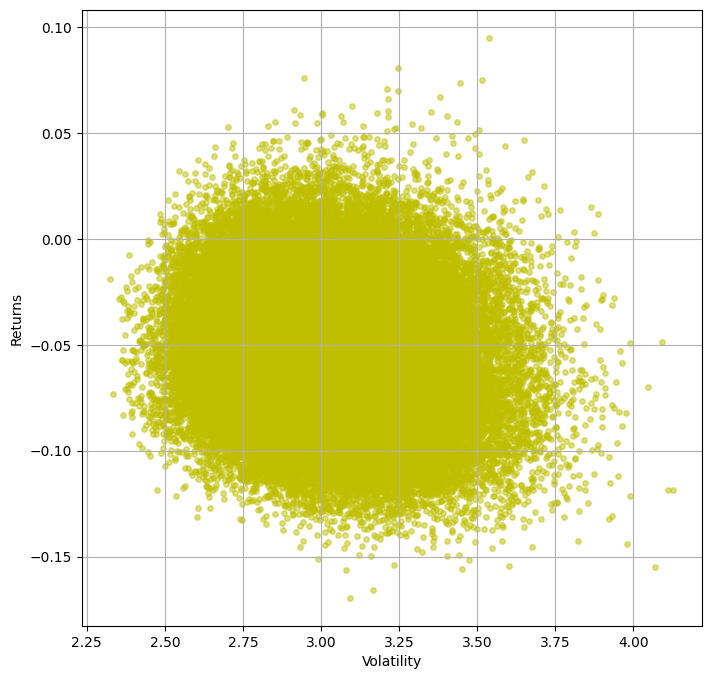

In [21]:
#plot
portfolios_V1.plot.scatter(x='Volatility', y='Returns', marker='o', color='y', s=15, alpha=0.5, grid=True, figsize=[8, 8])

In [22]:
min_vol_port = portfolios_V1.iloc[portfolios_V1['Volatility'].idxmin()]
min_vol_port

Returns          -0.019057
Volatility        2.323847
ACA.PA weight     0.000343
BN.PA weight      0.179060
BNP.PA weight     0.005733
CS.PA weight      0.053884
EN.PA weight      0.098648
ENGI.PA weight    0.083645
ORA.PA weight     0.338118
SAN.PA weight     0.054517
TTE.PA weight     0.112889
VIV.PA weight     0.073162
Name: 81327, dtype: float64

In [23]:
rf = 0.02
optimal_risky_port = portfolios_V1.iloc[((portfolios_V1['Returns'] - rf) / portfolios_V1['Volatility']).idxmax()]
optimal_risky_port

Returns           0.094985
Volatility        3.537974
ACA.PA weight     0.054968
BN.PA weight      0.027423
BNP.PA weight     0.043877
CS.PA weight      0.001173
EN.PA weight      0.243141
ENGI.PA weight    0.032435
ORA.PA weight     0.023260
SAN.PA weight     0.011625
TTE.PA weight     0.510854
VIV.PA weight     0.051244
Name: 21193, dtype: float64

Text(0, 0.5, 'Returns')

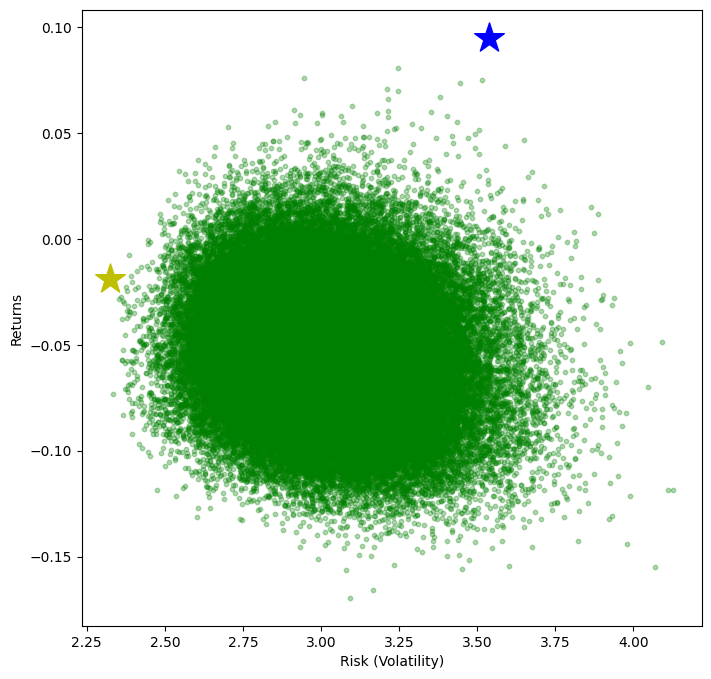

In [24]:
plt.subplots(figsize=(8, 8))
plt.scatter(portfolios_V1['Volatility'], portfolios_V1['Returns'], marker='o', s=10, alpha=0.3, color = 'green')
plt.scatter(min_vol_port[1], min_vol_port[0], color='y', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='b', marker='*', s=500)
plt.xlabel('Risk (Volatility)')
plt.ylabel('Returns')

In [25]:
portfolios_V1[(portfolios_V1['Returns'] >= 0.04) & (portfolios_V1['Volatility'] < 2.8)]

,Returns,Volatility,ACA.PA weight,BN.PA weight,BNP.PA weight,CS.PA weight,EN.PA weight,ENGI.PA weight,ORA.PA weight,SAN.PA weight,TTE.PA weight,VIV.PA weight
43028,0.043425,2.659380,0.018257,0.038426,0.044837,0.064624,0.032617,0.068467,0.227765,0.222206,0.242247,0.040554
65281,0.052795,2.701964,0.029016,0.038535,0.002582,0.100192,0.133813,0.065632,0.263919,0.073030,0.281450,0.011831
75609,0.045434,2.717797,0.014014,0.046090,0.008882,0.111701,0.022397,0.163467,0.220656,0.182738,0.210195,0.019861
82564,0.042738,2.714583,0.027366,0.188391,0.008335,0.057552,0.043752,0.011910,0.127180,0.282247,0.250946,0.002322
